In [1]:
%matplotlib inline

In [2]:
from glob import glob

In [3]:
npy_files = sorted(glob('*sweep_stream_on_off.npy'))
npy_files

['2016-10-14_184754_sweep_stream_on_off.npy',
 '2016-10-17_204527_sweep_stream_on_off.npy',
 '2016-10-18_124841_sweep_stream_on_off.npy',
 '2016-10-18_161556_sweep_stream_on_off.npy',
 '2016-10-18_192815_sweep_stream_on_off.npy',
 '2016-10-19_144701_sweep_stream_on_off.npy',
 '2016-10-19_180723_sweep_stream_on_off.npy',
 '2016-10-19_204329_sweep_stream_on_off.npy',
 '2016-10-21_141843_sweep_stream_on_off.npy',
 '2016-10-21_161825_sweep_stream_on_off.npy',
 '2016-10-25_141727_sweep_stream_on_off.npy']

In [4]:
plot_directory = '/home/flanigan/temp/'

In [5]:
df = pd.concat([pd.DataFrame.from_records(np.load(f)) for f in npy_files], ignore_index=True)
df.shape

(308, 76)

In [6]:
[c for c in df.columns]

['S_frequency',
 'S_xx',
 'S_xy',
 'S_yy',
 'analysis_epoch',
 'index',
 'io_class',
 'lo_index',
 'magnet_array_distance_from_base_mm',
 'magnet_array_orientation',
 'node_path',
 'number',
 'res_A_mag',
 'res_A_mag_error',
 'res_A_slope',
 'res_A_slope_error',
 'res_Q',
 'res_Q_e',
 'res_Q_e_imag',
 'res_Q_e_imag_error',
 'res_Q_e_real',
 'res_Q_e_real_error',
 'res_Q_error',
 'res_Q_i',
 'res_delay',
 'res_delay_error',
 'res_f_0',
 'res_f_0_error',
 'res_f_min',
 'res_f_min_error',
 'res_frequency_data',
 'res_model_frequency',
 'res_model_s21',
 'res_model_s21_at_f_0',
 'res_model_s21_normalized',
 'res_model_s21_normalized_at_f_0',
 'res_phi',
 'res_phi_error',
 'res_redchi',
 'res_s21_data',
 'res_s21_data_normalized',
 'res_s21_errors',
 'roach_adc_sample_rate',
 'roach_bank',
 'roach_boffile',
 'roach_dac_attenuation',
 'roach_debug_register',
 'roach_fft_shift_register',
 'roach_hardware_delay_samples',
 'roach_heterodyne',
 'roach_lo_frequency',
 'roach_loopback',
 'roach_mo

In [7]:
no_magnet = df[df['magnet_array_distance_from_base_mm'].isnull()]
magnet = df[df['magnet_array_distance_from_base_mm'].notnull()].sort_values(by='sweep_temperature_package')

In [8]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'gray']

/home/flanigan/miniconda2/envs/analysis/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


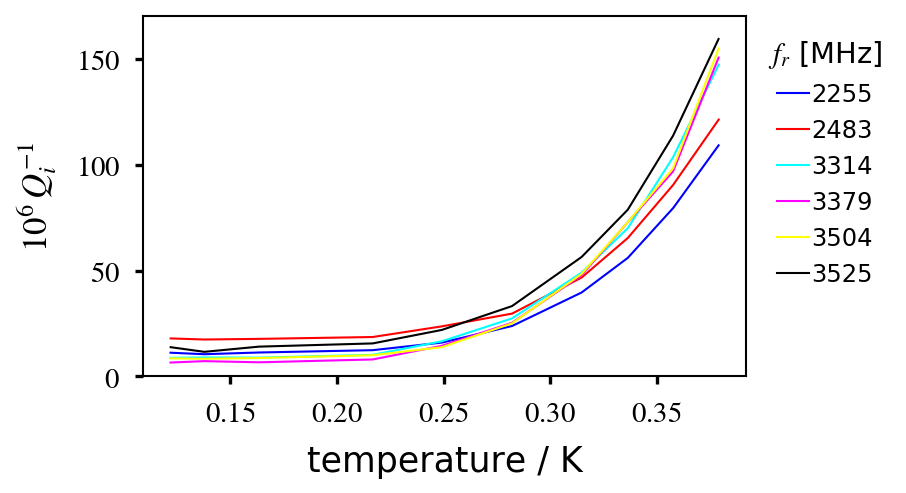

In [9]:
attenuation = 30
fig, ax = plt.subplots()
ax.set_xlabel('temperature / K')
ax.set_ylabel('$10^6 \, Q_i^{-1}$')

for lo_index in [0, 2, 3, 4, 5, 6]:
    df_index = magnet[(magnet.lo_index == lo_index) & (magnet.roach_dac_attenuation == attenuation)]
    ax.plot(df_index.sweep_temperature_package, 1e6 / df_index.res_Q_i, '-',
            color=colors[lo_index], label='{:.0f}'.format(1e-6 * df_index.res_f_0.max()))

legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='xx-small', title=r'$f_r$ [MHz]');
legend.get_title().set_fontsize('x-small')
ax.set_ylim(0, 170)

fig.savefig(plot_directory + 'iQi_vs_T.pdf')

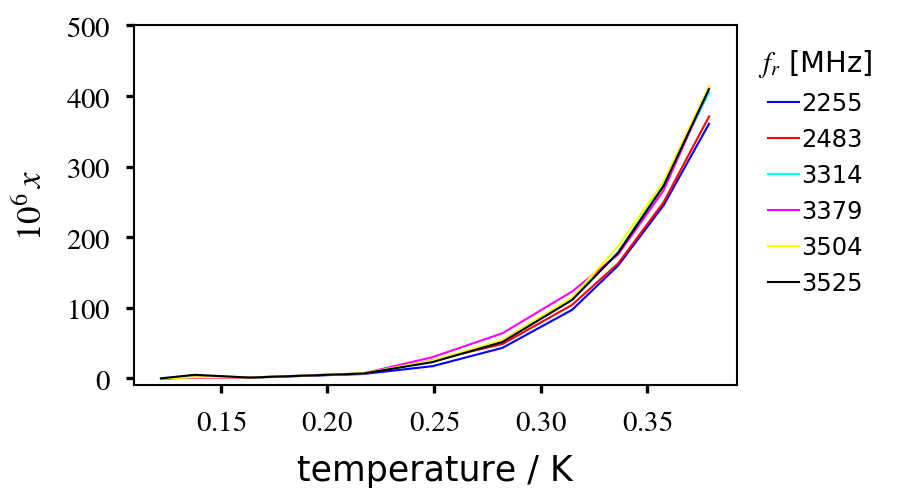

In [10]:
attenuation = 30
fig, ax = plt.subplots()
ax.set_xlabel('temperature / K')
ax.set_ylabel('$10^6 \, x$')

for lo_index in [0, 2, 3, 4, 5, 6]:
    df_index = magnet[(magnet.lo_index == lo_index) & (magnet.roach_dac_attenuation == attenuation)]
    ax.plot(df_index.sweep_temperature_package, 1e6 * (df_index.res_f_0.max() / df_index.res_f_0 - 1), '-',
            color=colors[lo_index], label='{:.0f}'.format(1e-6 * df_index.res_f_0.max()))

legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='xx-small', title=r'$f_r$ [MHz]');
legend.get_title().set_fontsize('x-small')
ax.set_ylim(-10, 500)

fig.savefig(plot_directory + 'iQi_vs_T.pdf')

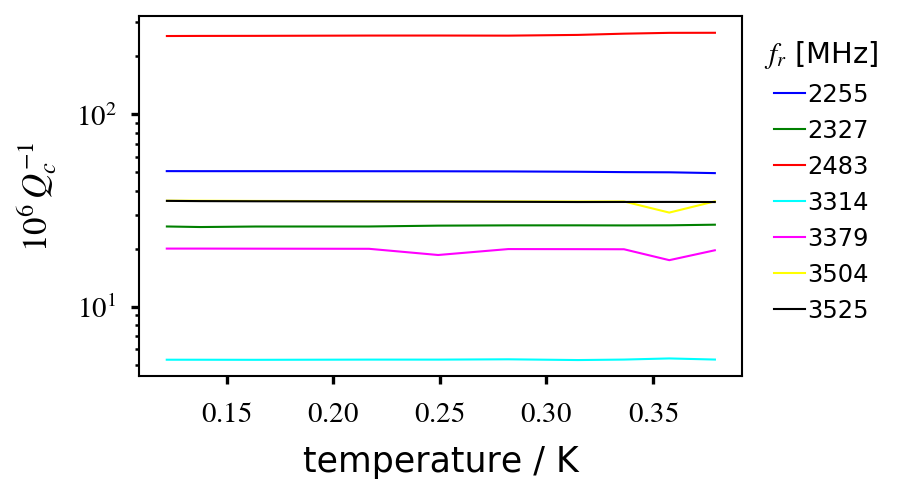

In [11]:
attenuation = 30
fig, ax = plt.subplots()
ax.set_xlabel('temperature / K')
ax.set_ylabel('$10^6 \, Q_c^{-1}$')
ax.set_yscale('log')

for lo_index in np.unique(df.lo_index):
    df_index = magnet[(magnet.lo_index == lo_index) & (magnet.roach_dac_attenuation == attenuation)]
    ax.plot(df_index.sweep_temperature_package, 1e6 / df_index.res_Q_e_real, '-',
            color=colors[lo_index], label='{:.0f}'.format(1e-6 * df_index.res_f_0.max()))

legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='xx-small', title=r'$f_r$ [MHz]');
legend.get_title().set_fontsize('x-small')

In [12]:
no_magnet_markersize = 3
magnet_markersize = 2
no_magnet_color = 'gray'
magnet_color = 'red'
i_marker = 'o'
c_marker = 's'

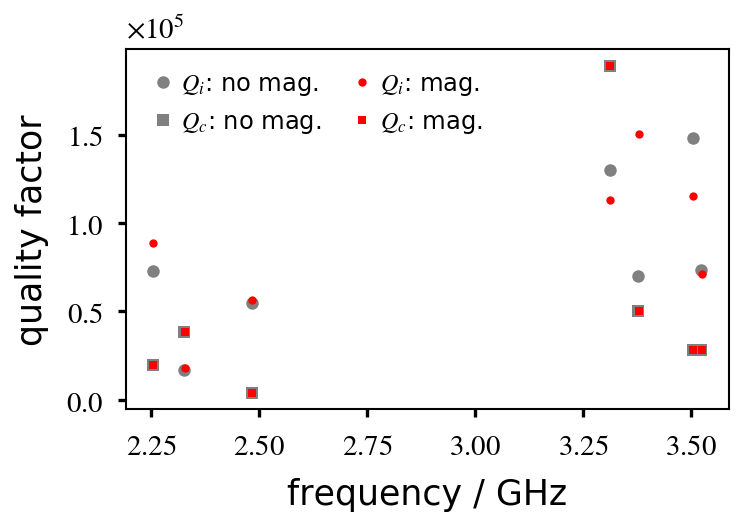

In [13]:
attenuation = 30
f_scale = 1e-9
no_magnet_150mK = no_magnet[(no_magnet.root_path == '/data/detectors/2016-10-14_184754_sweep_stream_on_off/') &
                            (no_magnet.roach_dac_attenuation == attenuation)]
magnet_150mK = magnet[(magnet.root_path == '/data/detectors/2016-10-18_161556_sweep_stream_on_off/') &
                      (magnet.roach_dac_attenuation == attenuation)]

fig, ax = plt.subplots()
ax.set_xlabel('frequency / GHz')
ax.set_ylabel('quality factor')

ax.plot(f_scale * no_magnet_150mK.res_f_0, no_magnet_150mK.res_Q_i,
        color=no_magnet_color, marker=i_marker, markersize=no_magnet_markersize,
        label='$Q_i$: no mag.',
        linestyle='none')
ax.plot(f_scale * no_magnet_150mK.res_f_0, no_magnet_150mK.res_Q_e_real,
        color=no_magnet_color, marker=c_marker, markersize=no_magnet_markersize,
        label='$Q_c$: no mag.',
        linestyle='none')
ax.plot(f_scale * magnet_150mK.res_f_0, magnet_150mK.res_Q_i,
        color=magnet_color, marker=i_marker, markersize=magnet_markersize,
        label='$Q_i$: mag.',
        linestyle='none')
ax.plot(f_scale * magnet_150mK.res_f_0, magnet_150mK.res_Q_e_real,
        color=magnet_color, marker=c_marker, markersize=magnet_markersize,
        label='$Q_c$: mag.',
        linestyle='none')

ax.legend(loc='upper left', fontsize='xx-small', ncol=2, numpoints=1)

fig.savefig(plot_directory + 'magnet_Qi_and_Qc_vs_f.pdf')